In [1]:
import pandas as pd
import numpy as np
from datetime import timedelta, datetime
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import prepare

In [26]:
df = pd.read_csv('all_data.csv', index_col = 0, parse_dates = True)
df.head(2)

,item_id,sale_amount,sale_date,sale_id,store_id,store_address,store_city,store_state,store_zipcode,item_brand,item_name,item_price,item_upc12,item_upc14
0,1,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
1,1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013


In [27]:
# set sale_date as datetime column
df.sale_date = pd.to_datetime(df.sale_date, format='%a, %d %b %Y %H:%M:%S %Z')

In [28]:
# set sale_date as index
df = df.sort_values('sale_date').set_index('sale_date')

In [29]:
df.head(2)

,item_id,sale_amount,sale_id,store_id,store_address,store_city,store_state,store_zipcode,item_brand,item_name,item_price,item_upc12,item_upc14
sale_date,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2013-01-01 00:00:00+00:00,12,26.0,211817,7,12018 Perrin Beitel Rd,San Antonio,TX,78217,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211


#### Plot the distribution of sale_amount and item_price.

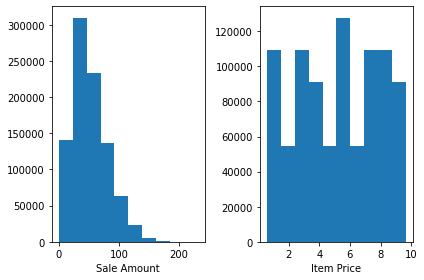

In [138]:
fig, ax = plt.subplots(1, 2)

ax[0].hist(df['sale_amount']) 
ax[0].set_xlabel('Sale Amount')

ax[1].hist(df['item_price'])
ax[1].set_xlabel('Item Price')
plt.tight_layout()


#### Add a 'month' and 'day of week' column to your dataframe, derived from the index using the keywords for those date parts.

In [139]:
df['day_of_week'] = df.index.day_name()

In [140]:
df['month'] = df.index.month

In [141]:
df.head(2)

,item_id,sale_amount,sale_id,store_id,store_address,store_city,store_state,store_zipcode,item_brand,item_name,item_price,item_upc12,item_upc14,day_of_week,month,sales_total,sales_diff
sale_date,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,Tuesday,1,10.92,NaN
2013-01-01 00:00:00+00:00,12,26.0,211817,7,12018 Perrin Beitel Rd,San Antonio,TX,78217,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,Tuesday,1,218.40,207.48


#### Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.

In [142]:
df['sales_total'] = df.sale_amount * df.item_price

#### Using pandas.DataFrame.diff() function, create a new column that is the result of the current sales - the previous days sales.

In [157]:
sales = df.resample('D')[['sales_total']].sum()
sales['sales_diff'] = sales.sales_total.diff(1)

In [160]:
sales.head(2)

,sales_total,sales_diff
sale_date,,
2013-01-01 00:00:00+00:00,73844.01,NaN
2013-01-02 00:00:00+00:00,73570.58,-273.43


## Using the OPS data acquired in the Acquire exercises opsd_germany_daily.csv, complete the following:

##### Convert date column to datetime format.

In [4]:
power = pd.read_csv('opsd_germany_daily.csv',index_col=0 )

In [5]:
power.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [6]:
power['Date'] = pd.to_datetime(power['Date'])

In [7]:
power = power.sort_values('Date').set_index('Date')

In [8]:
power.head(2)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN


#### Plot the distribution of each of your variables.

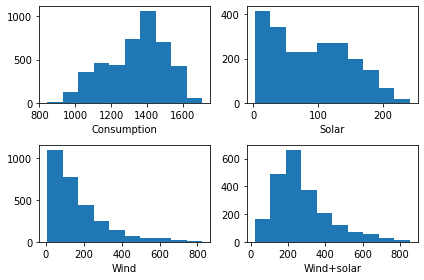

In [9]:
fig, ax = plt.subplots(2, 2)

ax[0, 0].hist(power['Consumption']) #row=0, col=0
ax[0,0].set_xlabel('Consumption')

ax[1, 0].hist(power['Wind']) #row=1, col=0
ax[1,0].set_xlabel('Wind')

ax[0, 1].hist(power['Solar']) #row=0, col=1
ax[0,1].set_xlabel('Solar')

ax[1, 1].hist(power['Wind+Solar']) #row=1, col=1

ax[1,1].set_xlabel('Wind+solar')
plt.tight_layout()

#### Add a month and a year column to your dataframe.


In [10]:
power['month'] = power.index.month
power['year'] = power.index.year

In [11]:
power.head(2)

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,1,2006
2006-01-02,1380.521,NaN,NaN,NaN,1,2006


In [127]:
from vega_datasets import data

In [128]:
data = data.sf_temps()

In [129]:
data.tail()

,temp,date
8754,50.4,2010-12-31 19:00:00
8755,49.9,2010-12-31 20:00:00
8756,49.4,2010-12-31 21:00:00
8757,48.8,2010-12-31 22:00:00
8758,48.3,2010-12-31 23:00:00


#### Resample by the day and take the average temperature. Visualize the average temperature over time.

In [130]:
data = data.set_index('date')

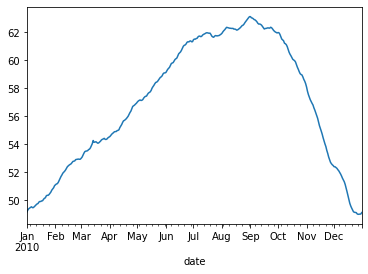

In [131]:
data.temp.resample('D').mean().plot()

#### Write the code necessary to visualize the minimum temperature over time.
#### Write the code necessary to visualize the maximum temperature over time.

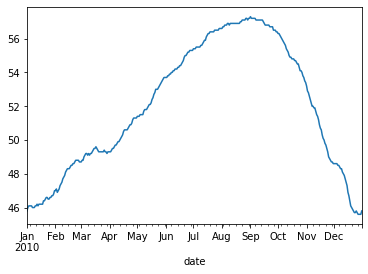

In [132]:
data.temp.resample('D').min().plot()

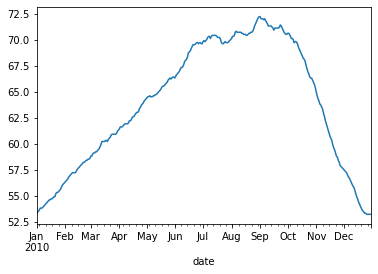

In [133]:
data.temp.resample('D').max().plot()

#### Which month is the coldest, on average?
#### Which month has the highest average temperature?

In [134]:
data.temp.resample('M').mean()

date
2010-01-31    49.984140
2010-02-28    52.243899
2010-03-31    53.956528
2010-04-30    55.633056
2010-05-31    57.970968
2010-06-30    60.444722
2010-07-31    61.765457
2010-08-31    62.405376
2010-09-30    62.487083
2010-10-31    60.253091
2010-11-30    55.185139
2010-12-31    50.498253
Freq: M, Name: temp, dtype: float64

In [135]:
data['month'] = data.index.month
data.head(3)

,temp,month
date,,
2010-01-01 00:00:00,47.8,1
2010-01-01 01:00:00,47.4,1
2010-01-01 02:00:00,46.9,1


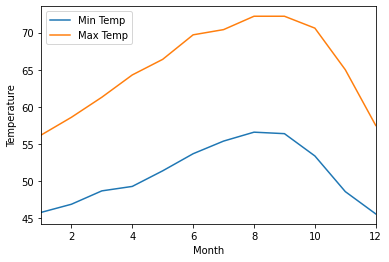

In [72]:
ax1 = data.groupby('month').temp.min().plot()
ax2 = data.groupby('month').temp.max().plot()
ax1.set_xlabel("Month")
ax1.set_ylabel("Temperature")
ax1.legend(["Min Temp", "Max Temp"])

In [136]:
data.groupby('month').temp.mean().idxmin()

1

In [137]:
data.groupby('month').temp.mean().idxmax()

9

#### Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [75]:
temp = data.temp.resample('D').agg(['min', 'max'])

In [76]:
temp.head(2)

,min,max
date,,
2010-01-01,45.8,53.3
2010-01-02,46.0,53.4


In [77]:
temp['temp_change'] = temp['max']-temp['min']

In [162]:
temp.head(2)

,min,max,temp_change
date,,,
2010-01-01,45.8,53.3,7.5
2010-01-02,46.0,53.4,7.4


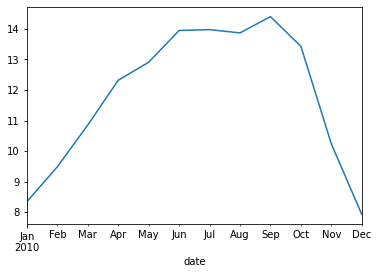

In [78]:
temp.temp_change.resample('M').mean().plot()

In [79]:
temp.temp_change.resample('M').mean().idxmax().month_name()

'September'

#### Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

Text(0.5, 0, 'Date')

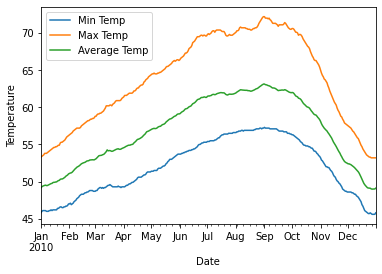

In [80]:
ax1 = data.temp.resample('D').min().plot()
ax2 = data.temp.resample('D').max().plot()
ax3 = data.temp.resample('D').mean().plot()
ax1.legend(["Min Temp", "Max Temp", "Average Temp"])
ax2.set_ylabel('Temperature')
ax1.set_xlabel('Date')

***
## Use the Vega_Datasets to work with the flights_20k data/


In [95]:
from vega_datasets import data
flights = data.flights_20k()

In [96]:
flights.head()

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND


#### Convert any negative delays to 0.



In [97]:
flights['delay'] = flights.delay.apply(lambda x: 0 if x < 0 else x)

#### Which hour of the day has the highest average delay?


In [98]:
flights = flights.set_index('date')

In [99]:
flights['hour'] = flights.index.hour

In [100]:
flights.head(2)

,delay,distance,origin,destination,hour
date,,,,,
2001-01-13 14:56:00,32,417,SAN,SJC,14
2001-01-31 16:40:00,0,1093,FLL,ISP,16


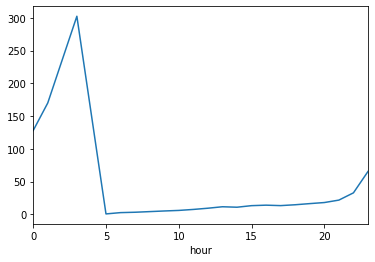

In [103]:
flights.groupby('hour').delay.mean().plot()

In [102]:
flights.groupby('hour').delay.mean().idxmax()

3

#### Does the day of the week make a difference in the delay amount?


In [117]:
flights['week_day'] = flights.index.day_name()

In [118]:
flights.head(2)

,delay,distance,origin,destination,hour,month,week_day
date,,,,,,,
2001-01-13 14:56:00,32,417,SAN,SJC,14,January,Saturday
2001-01-31 16:40:00,0,1093,FLL,ISP,16,January,Wednesday


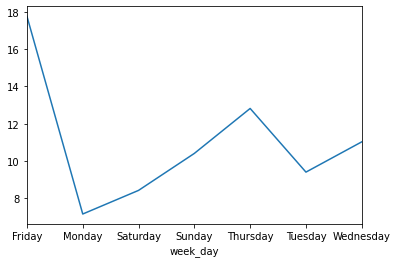

In [125]:
flights.groupby('week_day').delay.mean().plot()

In [113]:
flights.groupby('week_day').delay.mean().idxmax()

'Friday'

#### Does the month make a difference in the delay amount?

In [105]:
flights['month'] = flights.index.month_name()

In [106]:
flights.head(2)

,delay,distance,origin,destination,hour,month
date,,,,,,
2001-01-13 14:56:00,32,417,SAN,SJC,14,January
2001-01-31 16:40:00,0,1093,FLL,ISP,16,January


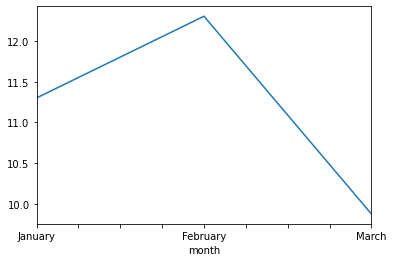

In [107]:
flights.groupby('month',sort=False).delay.mean().plot()

In [45]:
flights.groupby('month').delay.mean().idxmax()

'February'

Average delay is maximum in month of February